$$\newcommand{\xv}{\mathbf{x}}
\newcommand{\Xv}{\mathbf{X}}
\newcommand{\yv}{\mathbf{y}}
\newcommand{\Yv}{\mathbf{Y}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\av}{\mathbf{a}}
\newcommand{\Wv}{\mathbf{W}}
\newcommand{\wv}{\mathbf{w}}
\newcommand{\betav}{\mathbf{\beta}}
\newcommand{\gv}{\mathbf{g}}
\newcommand{\Hv}{\mathbf{H}}
\newcommand{\dv}{\mathbf{d}}
\newcommand{\Vv}{\mathbf{V}}
\newcommand{\vv}{\mathbf{v}}
\newcommand{\tv}{\mathbf{t}}
\newcommand{\Tv}{\mathbf{T}}
\newcommand{\Sv}{\mathbf{S}}
\newcommand{\Gv}{\mathbf{G}}
\newcommand{\zv}{\mathbf{z}}
\newcommand{\Zv}{\mathbf{Z}}
\newcommand{\Norm}{\mathcal{N}}
\newcommand{\muv}{\boldsymbol{\mu}}
\newcommand{\sigmav}{\boldsymbol{\sigma}}
\newcommand{\phiv}{\boldsymbol{\phi}}
\newcommand{\Phiv}{\boldsymbol{\Phi}}
\newcommand{\Sigmav}{\boldsymbol{\Sigma}}
\newcommand{\Lambdav}{\boldsymbol{\Lambda}}
\newcommand{\half}{\frac{1}{2}}
\newcommand{\argmax}[1]{\underset{#1}{\operatorname{argmax}}}
\newcommand{\argmin}[1]{\underset{#1}{\operatorname{argmin}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
\newcommand{\dimensionbar}[1]{\underset{#1}{\operatorname{|}}}
\newcommand{\grad}{\mathbf{\nabla}}
\newcommand{\ebx}[1]{e^{\betav_{#1}^T \xv_n}}
\newcommand{\eby}[1]{e^{y_{n,#1}}}
\newcommand{\Tiv}{\mathbf{Ti}}
\newcommand{\Fv}{\mathbf{F}}
\newcommand{\ones}[1]{\mathbf{1}_{#1}}
$$

# Analysis of Neural Network Classifiers and Bottleneck Networks

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
!wget http://www.cs.colostate.edu/~anderson/cs480/notebooks/nn2.tar
!tar xvf nn2.tar

--2017-03-18 21:46:14--  http://www.cs.colostate.edu/~anderson/cs480/notebooks/nn2.tar
Resolving www.cs.colostate.edu (www.cs.colostate.edu)... 129.82.45.114
Connecting to www.cs.colostate.edu (www.cs.colostate.edu)|129.82.45.114|:80... connected.
HTTP request sent, awaiting response... 200 OK
Length: 51200 (50K) [application/x-tar]
Saving to: ‘nn2.tar’

nn2.tar             100%[===================>]  50.00K  --.-KB/s    in 0.1s    

2017-03-18 21:46:14 (473 KB/s) - ‘nn2.tar’ saved [51200/51200]

neuralnetworks.py
mlutils.py
scaledconjugategradient.py


In [2]:
import neuralnetworks as nn
import qdalda
import mlutils as ml

Now let's go through the steps of applying a neural network classifier to the [Student Alcohol Consumption data set](http://archive.ics.uci.edu/ml/datasets/STUDENT+ALCOHOL+CONSUMPTION),  recently added to the [UCI ML Repository](http://archive.ics.uci.edu/ml/). This data set has 1,044 samples, each with 33 attributes.  The paper [Using data Mining to Predict Secondary School Student Alcohol Consumption](https://www.researchgate.net/publication/296695247_USING_DATA_MINING_TO_PREDICT_SECONDARY_SCHOOL_STUDENT_ALCOHOL_CONSUMPTION) describes the application of random forests to this classification problem.  This paper will serve as our guide on how to set up the data.

Start by downloading the `student.zip` file, either by clicking on the link in the Data Folder at the Repository, or by using `wget`.

In [3]:
!wget http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip
!unzip -o student.zip
!rm student.zip
!ls student*

--2017-03-21 14:01:09--  http://archive.ics.uci.edu/ml/machine-learning-databases/00356/student.zip
Resolving archive.ics.uci.edu (archive.ics.uci.edu)... failed: Temporary failure in name resolution.
wget: unable to resolve host address ‘archive.ics.uci.edu’
unzip:  cannot find or open student.zip, student.zip.zip or student.zip.ZIP.
rm: cannot remove 'student.zip': No such file or directory
ls: cannot access 'student*': No such file or directory


In [4]:
!cat student.txt

cat: student.txt: No such file or directory


In [6]:
!head -10 student-mat.csv

school;sex;age;address;famsize;Pstatus;Medu;Fedu;Mjob;Fjob;reason;guardian;traveltime;studytime;failures;schoolsup;famsup;paid;activities;nursery;higher;internet;romantic;famrel;freetime;goout;Dalc;Walc;health;absences;G1;G2;G3
"GP";"F";18;"U";"GT3";"A";4;4;"at_home";"teacher";"course";"mother";2;2;0;"yes";"no";"no";"no";"yes";"yes";"no";"no";4;3;4;1;1;3;6;"5";"6";6
"GP";"F";17;"U";"GT3";"T";1;1;"at_home";"other";"course";"father";1;2;0;"no";"yes";"no";"no";"no";"yes";"yes";"no";5;3;3;1;1;3;4;"5";"5";6
"GP";"F";15;"U";"LE3";"T";1;1;"at_home";"other";"other";"mother";1;2;3;"yes";"no";"yes";"no";"yes";"yes";"yes";"no";4;3;2;2;3;3;10;"7";"8";10
"GP";"F";15;"U";"GT3";"T";4;2;"health";"services";"home";"mother";1;3;0;"no";"yes";"yes";"yes";"yes";"yes";"yes";"yes";3;2;2;1;1;5;2;"15";"14";15
"GP";"F";16;"U";"GT3";"T";3;3;"other";"other";"home";"father";1;2;0;"no";"yes";"yes";"no";"yes";"yes";"no";"no";4;3;2;1;2;5;4;"6";"10";10
"GP";"M";16;"U";"LE3";"T";4;3;"services";"other";"reputation";"mot

So, first of all, we see that semi-colons are the field separator, and the first line is column headings. Also, notice that the non-numeric values are surrounded by double quotes.  And the third and second to last numeric fields are also surrounded by double quotes.

Read the first line into a list of column names.

In [7]:
with open('student-mat.csv') as file:
    headings = file.readline().split(';')
    headings = [head.strip() for head in headings]
print(headings)

['school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'Dalc', 'Walc', 'health', 'absences', 'G1', 'G2', 'G3']


Now, how do we read the data lines?  My usual answer is to use [np.loadtxt](http://docs.scipy.org/doc/numpy-1.10.0/reference/generated/numpy.loadtxt.html). The [Pandas](http://pandas.pydata.org/) package is something you should read about and practice using in the future.

`np.loadtxt` allows you to specify a function to call to convert values in each column.  The converters are specified as a dictionary with keys for column indices.  Here is a definition of converters for each column interspersed with the data set's documentation for each attribute.

In [8]:
# 1 school - student's school (binary: 'GP' - Gabriel Pereira or 'MS' - Mousinho da Silveira) 
school = {'GP':0, 'MS':1}
# 2 sex - student's sex (binary: 'F' - female or 'M' - male) 
gender = {'F':0, 'M':1}
# 3 age - student's age (numeric: from 15 to 22) 
# 4 address - student's home address type (binary: 'U' - urban or 'R' - rural) 
address = {'U':0, 'R':1}
# 5 famsize - family size (binary: 'LE3' - less or equal to 3 or 'GT3' - greater than 3) 
famsize = {'LE3':0, 'GT3':1}
# 6 Pstatus - parent's cohabitation status (binary: 'T' - living together or 'A' - apart) 
parentsStatus = {'T':0, 'A':1}
# 7 Medu - mother's education (numeric: 0 - none, 1 - primary education (4th grade), 2 Ã¢â‚¬â€œ 5th to 9th grade, 3 Ã¢â‚¬â€œ secondary education or 4 Ã¢â‚¬â€œ higher education) 
# 8 Fedu - father's education (numeric: 0 - none, 1 - primary education (4th grade), 2 Ã¢â‚¬â€œ 5th to 9th grade, 3 Ã¢â‚¬â€œ secondary education or 4 Ã¢â‚¬â€œ higher education) 
# 9 Mjob - mother's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
parentJob = {'teacher':0, 'health':1, 'services':2, 'at_home':3, 'other':4}
# 10 Fjob - father's job (nominal: 'teacher', 'health' care related, civil 'services' (e.g. administrative or police), 'at_home' or 'other') 
# 11 reason - reason to choose this school (nominal: close to 'home', school 'reputation', 'course' preference or 'other') 
reason = {'home':0, 'reputation':1, 'course':2, 'other':3}
# 12 guardian - student's guardian (nominal: 'mother', 'father' or 'other') 
guardian = {'mother':0, 'father':1, 'other':2}
# 13 traveltime - home to school travel time (numeric: 1 - <15 min., 2 - 15 to 30 min., 3 - 30 min. to 1 hour, or 4 - >1 hour) 
# 14 studytime - weekly study time (numeric: 1 - <2 hours, 2 - 2 to 5 hours, 3 - 5 to 10 hours, or 4 - >10 hours) 
# 15 failures - number of past class failures (numeric: n if 1<=n<3, else 4) 
# 16 schoolsup - extra educational support (binary: yes or no) 
noYes = {'no':0, 'yes':1}
# 17 famsup - family educational support (binary: yes or no) 
# 18 paid - extra paid classes within the course subject (Math or Portuguese) (binary: yes or no) 
# 19 activities - extra-curricular activities (binary: yes or no) 
# 20 nursery - attended nursery school (binary: yes or no) 
# 21 higher - wants to take higher education (binary: yes or no) 
# 22 internet - Internet access at home (binary: yes or no) 
# 23 romantic - with a romantic relationship (binary: yes or no) 
# 24 famrel - quality of family relationships (numeric: from 1 - very bad to 5 - excellent) 
# 25 freetime - free time after school (numeric: from 1 - very low to 5 - very high) 
# 26 goout - going out with friends (numeric: from 1 - very low to 5 - very high) 
# 27 Dalc - workday alcohol consumption (numeric: from 1 - very low to 5 - very high) 
# 28 Walc - weekend alcohol consumption (numeric: from 1 - very low to 5 - very high) 
# 29 health - current health status (numeric: from 1 - very bad to 5 - very good) 
# 30 absences - number of school absences (numeric: from 0 to 93) 

# # these grades are related with the course subject, Math or Portuguese: 
# 31 G1 - first period grade (numeric: from 0 to 20) 
# 31 G2 - second period grade (numeric: from 0 to 20) 
# 32 G3 - final grade (numeric: from 0 to 20, output target) 

def bs(bytes):
    '''Convert bytes to string and remove double quotes'''
    # print(bytes)
    return str(bytes,'utf-8').replace('"','')

converters = {0: lambda x: school[bs(x)],
              1: lambda x: gender[bs(x)],
              2: lambda age: age,
              3: lambda x: address[bs(x)],
              4: lambda x: famsize[bs(x)],
              5: lambda x: parentsStatus[bs(x)],
              6: lambda motherEd: motherEd,
              7: lambda fatherEd: fatherEd,
              8: lambda m: parentJob[bs(m)],
              9: lambda f: parentJob[bs(f)],
              10: lambda x: reason[bs(x)],
              11: lambda x: guardian[bs(x)],
              12: lambda travelTime: travelTime,
              13: lambda studyTime: studyTime,
              14: lambda failures: failures,
              15: lambda schoolSupport: noYes[bs(schoolSupport)],
              16: lambda famsup: noYes[bs(famsup)],
              17: lambda paid: noYes[bs(paid)],
              18: lambda activities: noYes[bs(activities)],
              19: lambda nursery: noYes[bs(nursery)],
              20: lambda higher: noYes[bs(higher)],
              21: lambda internet: noYes[bs(internet)],
              22: lambda romantic: noYes[bs(romantic)],
              23: lambda famrel: famrel,
              24: lambda freetime: freetime,
              25: lambda goout: goout,
              26: lambda workdayAlcohol: workdayAlcohol,
              27: lambda weekendAlcohol: weekendAlcohol,
              28: lambda health: health,
              29: lambda absences: absences,
              30: lambda G1: bs(G1),
              31: lambda G2: bs(G2),
              32: lambda G3: G3}

In [9]:
converters[11](b'mother'), converters[11](b'father')

(0, 1)

Now we can read in both files.

In [10]:
with open('student-mat.csv') as file:
    headings = file.readline().split(';')
    headings = [head.strip() for head in headings]
    datamat = np.loadtxt(file, delimiter=';',converters=converters)

datapor = np.loadtxt('student-por.csv', delimiter=';',skiprows=1,converters=converters)

In [11]:
datamat.shape, datapor.shape

((395, 33), (649, 33))

These two data sets are for two different tests, a math test and a portugese test.  Let's combine them, and add a first column with value 0 for math and 1 for portugese.

In [12]:
# add first column to indicate which subject
headings = ['subject'] + headings
datamat = np.hstack((np.zeros((datamat.shape[0],1)), datamat))
datapor = np.hstack((np.ones((datapor.shape[0],1)), datapor))

data = np.vstack((datamat,datapor))
data.shape

(1044, 34)

Now we can pull out the two columns that indicate alcohol use. Which ones are they?

In [13]:
[i for i,head in enumerate(headings) if 'alc' in head]

[27, 28]

In [14]:
headings[27:29]

['Dalc', 'Walc']

In [15]:
data[:5,27:29]

array([[ 1.,  1.],
       [ 1.,  1.],
       [ 2.,  3.],
       [ 1.,  1.],
       [ 1.,  2.]])

Let's look at these values.  Add a bit of random noise to each to make them visible.

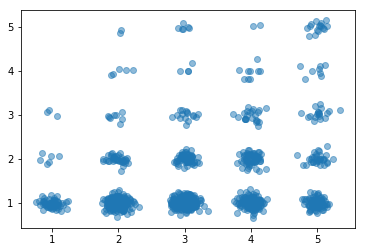

In [16]:
alcoholColumns = [26, 27]
T2 = data[:,alcoholColumns]
T2r = T2 + np.random.normal(0,0.1,size=T2.shape)
plt.plot(T2r[:,0],T2r[:,1], 'o', alpha=0.5);

For the experiments described in the paper linked above these two values are combined into one, then the value is discretized into two binary values, 0 for low alcohol use and 1 for high alcohol use. A weighted average of the two is formed, with weekend consumption (the second value) more heavily weighted. Then this value is quantized to 0 if the weighted average is less than 2, 1 otherwise.  In the paper, a cutoff of 3 was used.

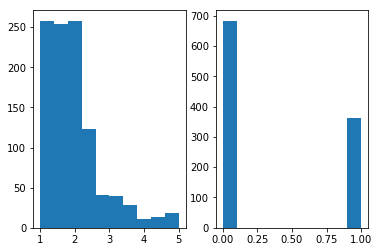

In [17]:
wavg = (T2[:,0:1] * 2 + T2[:,1:2] * 5) / 7
T = (wavg > 2.0).astype(int)
plt.subplot(1,2,1)
plt.hist(wavg)
plt.subplot(1,2,2)
plt.hist(T);

Now, for the input $X$ matrix.

In [18]:
X = data.copy()
X = np.delete(X, alcoholColumns, axis=1)
Xnames = [h for h in headings if 'alc' not in h]
print(len(Xnames),Xnames)
X.shape, T.shape

32 ['subject', 'school', 'sex', 'age', 'address', 'famsize', 'Pstatus', 'Medu', 'Fedu', 'Mjob', 'Fjob', 'reason', 'guardian', 'traveltime', 'studytime', 'failures', 'schoolsup', 'famsup', 'paid', 'activities', 'nursery', 'higher', 'internet', 'romantic', 'famrel', 'freetime', 'goout', 'health', 'absences', 'G1', 'G2', 'G3']


((1044, 32), (1044, 1))

Now we are ready to do some classifying.  Let's use a small neural network.

SCG: Iteration 10 fValue Eval 0.200228154938 Scale 0.0730761816025
SCG: Iteration 20 fValue Eval 0.188542718522 Scale 0.0365380908012
SCG: Iteration 30 fValue Eval 0.183388372153 Scale 0.0182690454006
SCG: Iteration 40 fValue Eval 0.179028100234 Scale 0.0182690454006
SCG: Iteration 50 fValue Eval 0.176981148963 Scale 0.0182690454006
SCG: Iteration 60 fValue Eval 0.174784302121 Scale 0.00456726135016
SCG: Iteration 70 fValue Eval 0.170232250038 Scale 0.00228363067508
SCG: Iteration 80 fValue Eval 0.168908173997 Scale 0.00228363067508
SCG: Iteration 90 fValue Eval 0.166497330319 Scale 0.00228363067508
SCG: Iteration 100 fValue Eval 0.164553173728 Scale 0.00228363067508
Accuracy 85.8237547893


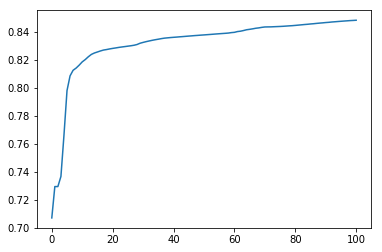

In [19]:
nnet = nn.NeuralNetworkClassifier(X.shape[1], [2], len(np.unique(T)))
nnet.train(X,T,nIterations=100,verbose=True)
predictedClass = nnet.use(X)
plt.plot(np.exp(-nnet.getErrorTrace()))
accuracy = np.sum(predictedClass == T)/ len(T) * 100
print('Accuracy',accuracy)

Let's try different sized nets.

0 82.2796934866
1 83.6206896552
2 84.8659003831
5 96.7432950192
10 99.9042145594


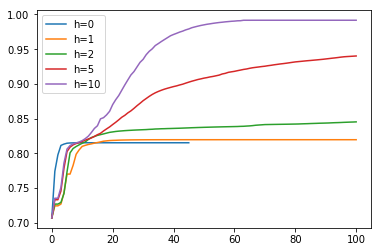

In [20]:
for hidden in [0,1,2,5,10]:
    nnet = nn.NeuralNetworkClassifier(X.shape[1], [hidden], len(np.unique(T)))
    nnet.train(X,T,nIterations=100,verbose=False)
    predictedClass = nnet.use(X)
    plt.plot(np.exp(-nnet.getErrorTrace()), label='h='+str(hidden))
    plt.legend(loc='best')
    accuracy = np.sum(predictedClass == T)/ len(T) * 100
    print(hidden,accuracy)

What about deeper nets?

[1] 83.908045977
[2] 84.9616858238
[5] 93.7739463602
[10] 99.9042145594
[1, 1] 87.1647509579
[2, 2] 90.9961685824
[5, 5] 95.5938697318
[10, 10] 99.9042145594
[1, 1, 1] 86.6858237548
[2, 2, 2] 90.7088122605
[5, 5, 5] 95.1149425287
[10, 10, 10] 100.0


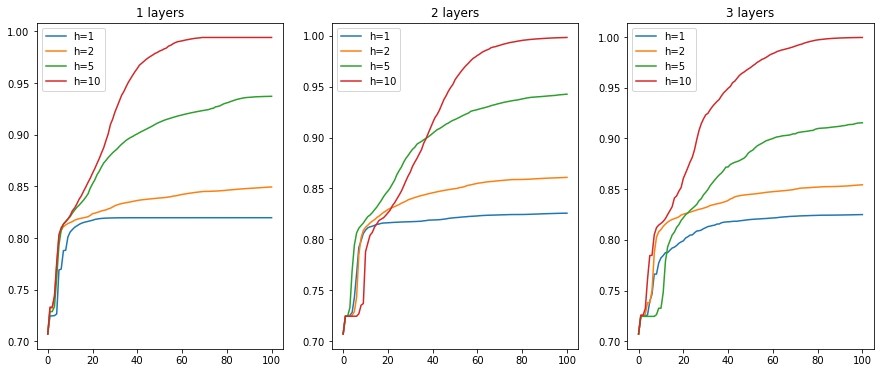

In [21]:
plt.figure(figsize=(15,6))
for layers in [1,2,3]:
    plt.subplot(1,3,layers)
    for hidden in [1,2,5,10]:
        hiddens = [hidden]*layers
        nnet = nn.NeuralNetworkClassifier(X.shape[1], hiddens, len(np.unique(T)))
        nnet.train(X,T,nIterations=100,verbose=False)
        predictedClass = nnet.use(X)
        plt.plot(np.exp(-nnet.getErrorTrace()), label='h='+str(hidden))
        plt.legend(loc='best')
        accuracy = np.sum(predictedClass == T)/ len(T) * 100
        print(hiddens,accuracy)
    plt.title('{} layers'.format(layers))

## Analysis

What patterns are the neural networks finding in the data that allow them to classify this data?

One way to answer this is to look at the first hidden layer weight vectors. We can see this in the network diagram.

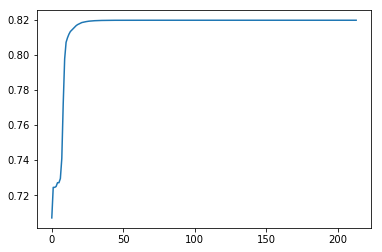

In [32]:
nnet = nn.NeuralNetworkClassifier(X.shape[1],[1],len(np.unique(T)))
nnet.train(X,T,nIterations = 500)
plt.plot(np.exp(-nnet.getErrorTrace()))

12.1990338097 0.00320905012751 216.262975779


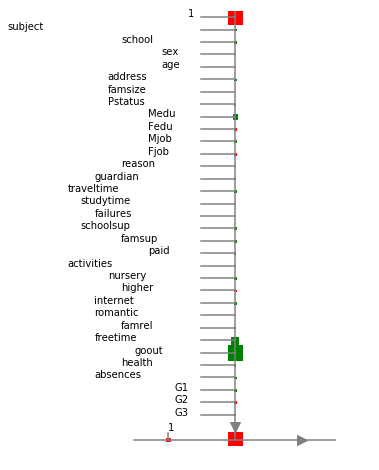

In [33]:
plt.figure(figsize=(6,8))
nnet.draw(inputNames = Xnames)

The largest magnitude weight in the hidden layer is the positive weight on `goout` on the single hidden unit.  `goout` has values of 1 to 5, with higher values representing more frequently going out.  The hidden unit is connected negatively to the output.  Considering these weights in isolation, the classifier output is decreased when the `goout` is higher than average.  When `goout` is lower than average, its standardized value is negative. When multiplied by its positive weight, its contribution to the sum in the second unit is negative.  This decreases the value of the output of the unit, when increases the output value sum.  

So, staying home is correlated with more alcohol use.  Make sense?

No, it doesn't.  What's wrong with our reasoning?

This network has one output unit, but remember, there are two classes.  The probability of the second class for a sample is 1 minus the probability of this single output unit.  So, the output unit in this network outputs estimates the probability of class 0, which represents low alcohol use.

So, now it all makes sense. `goout` is positively connected to the hidden unit, which is negatively connected to the low alcohol class output, or `goout` is negatively correlated to low alcohol use.

Let's check this by plotting the output class, 0 or 1, versus `goout`.

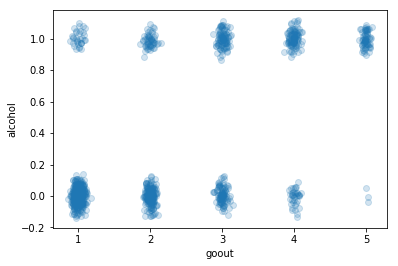

In [41]:
plt.plot(X[:,-6]+np.random.normal(0,0.05,size=X[:,-6].shape), T+np.random.normal(0,0.05,size=T.shape),'o',alpha=0.2)
plt.xlabel('goout')
plt.ylabel('alcohol');

Yep, it does look like alcohol use is positively correlated with `gooout`.

0.199746305745 0.00319852079984 216.262975779


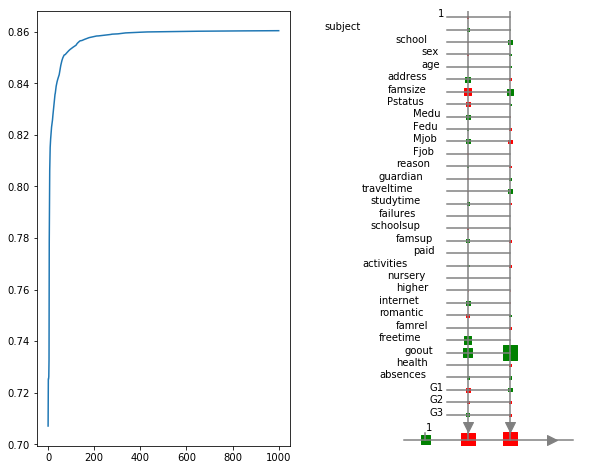

In [42]:
hidden = 2
plt.figure(figsize=(10,8))
nnet = nn.NeuralNetworkClassifier(X.shape[1],[hidden],len(np.unique(T)))
nnet.train(X,T,nIterations = 1000)
plt.subplot(1,2,1)
plt.plot(np.exp(-nnet.getErrorTrace()))
plt.subplot(1,2,2)
nnet.draw(inputNames = Xnames)

0.334039252007 0.00570638942554 216.262975779


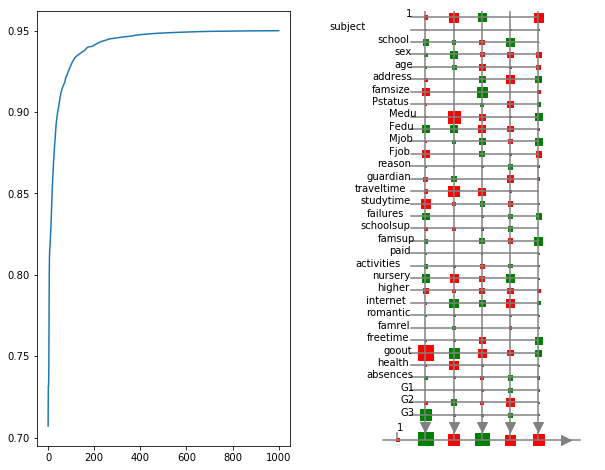

In [43]:
hidden = 5
plt.figure(figsize=(10,8))
nnet = nn.NeuralNetworkClassifier(X.shape[1],[hidden],len(np.unique(T)))
nnet.train(X,T,nIterations = 1000)
plt.subplot(1,2,1)
plt.plot(np.exp(-nnet.getErrorTrace()))
plt.subplot(1,2,2)
nnet.draw(inputNames = Xnames)

We could also take a look at extreme samples, such as the sample that produces the highest probability of high alcohol use, and the sample that produces the lowest probability of alcohol use.

In [44]:
predclass,prob,_ = nnet.use(X,allOutputs=True)

In [45]:
prob.shape

(1044, 2)

In [46]:
np.argmax(prob[:,1])

100

In [47]:
prob[100,:]

array([  7.77922377e-10,   9.99999957e-01])

In [48]:
highest = X[np.argmax(prob[:,1]),:]
lowest = X[np.argmin(prob[:,1]),:]
print('Hi Alc  Lo Alc')
for h,l,n in zip(highest,lowest,Xnames):
    print('{}\t{}\t{}'.format(h,l,n))

Hi Alc  Lo Alc
0.0	0.0	subject
0.0	0.0	school
1.0	1.0	sex
16.0	15.0	age
0.0	0.0	address
1.0	0.0	famsize
0.0	1.0	Pstatus
4.0	3.0	Medu
4.0	2.0	Fedu
2.0	2.0	Mjob
2.0	4.0	Fjob
3.0	0.0	reason
0.0	0.0	guardian
1.0	1.0	traveltime
1.0	2.0	studytime
0.0	0.0	failures
1.0	0.0	schoolsup
1.0	1.0	famsup
1.0	1.0	paid
1.0	0.0	activities
1.0	1.0	nursery
1.0	1.0	higher
1.0	1.0	internet
0.0	0.0	romantic
4.0	4.0	famrel
5.0	2.0	freetime
5.0	1.0	goout
4.0	1.0	health
14.0	0.0	absences
7.0	16.0	G1
7.0	18.0	G2
5.0	19.0	G3


Let's do this again with a larger network of 20 units.

5.606707021 7.25422287213e-06 148.720999405


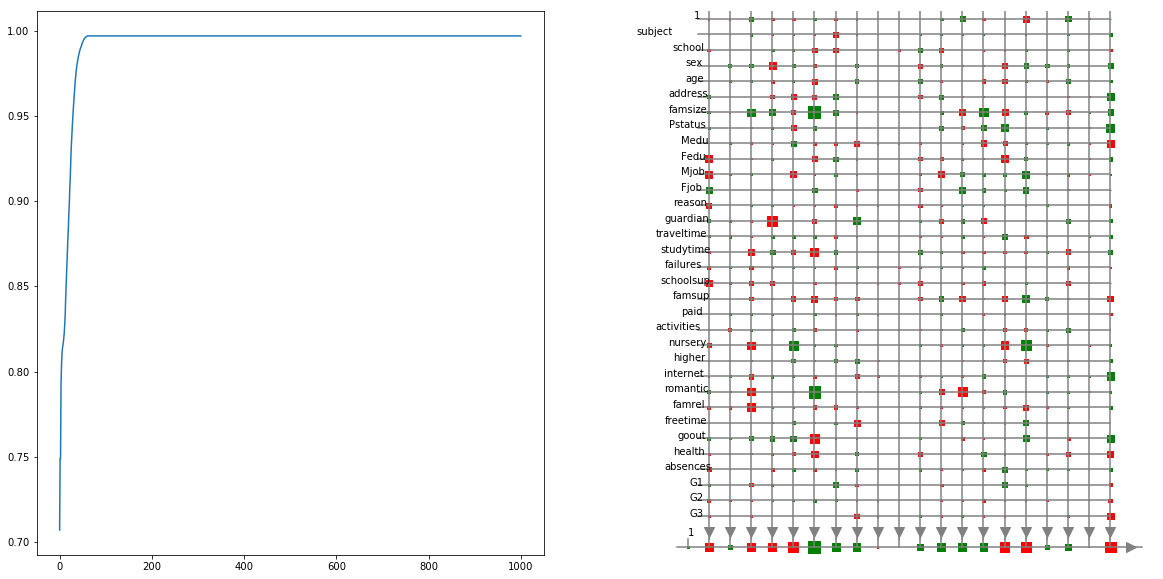

In [55]:
hidden = 20
plt.figure(figsize=(20,10))
nnet = nn.NeuralNetworkClassifier(X.shape[1],[hidden],len(np.unique(T)))
nnet.train(X,T,nIterations = 1000)
plt.subplot(1,2,1)
plt.plot(np.exp(-nnet.getErrorTrace()))
plt.subplot(1,2,2)
nnet.draw(inputNames = Xnames)

In [56]:
predclass,prob,_ = nnet.use(X,allOutputs=True)
highest = X[np.argmax(prob[:,1]),:]
lowest = X[np.argmin(prob[:,1]),:]
print('Hi Alc  Lo Alc')
for h,l,n in zip(highest,lowest,Xnames):
    print('{}\t{}\t{}'.format(h,l,n))

Hi Alc  Lo Alc
0.0	0.0	subject
0.0	0.0	school
1.0	0.0	sex
15.0	16.0	age
0.0	0.0	address
1.0	1.0	famsize
1.0	0.0	Pstatus
4.0	2.0	Medu
4.0	2.0	Fedu
4.0	3.0	Mjob
2.0	4.0	Fjob
1.0	0.0	reason
0.0	0.0	guardian
1.0	1.0	traveltime
4.0	2.0	studytime
0.0	1.0	failures
0.0	1.0	schoolsup
1.0	0.0	famsup
0.0	0.0	paid
1.0	1.0	activities
0.0	1.0	nursery
1.0	1.0	higher
1.0	1.0	internet
1.0	0.0	romantic
1.0	3.0	famrel
3.0	1.0	freetime
5.0	1.0	goout
3.0	5.0	health
4.0	6.0	absences
13.0	10.0	G1
13.0	13.0	G2
12.0	13.0	G3


# Bottleneck

By forcing all information to flow through a very narrow layer, a small-dimensional representation of each sample can be obtained.

9.51571168544 0.000697202999757 141.723356009
5.71445329795 0.23723262436 141.723356009


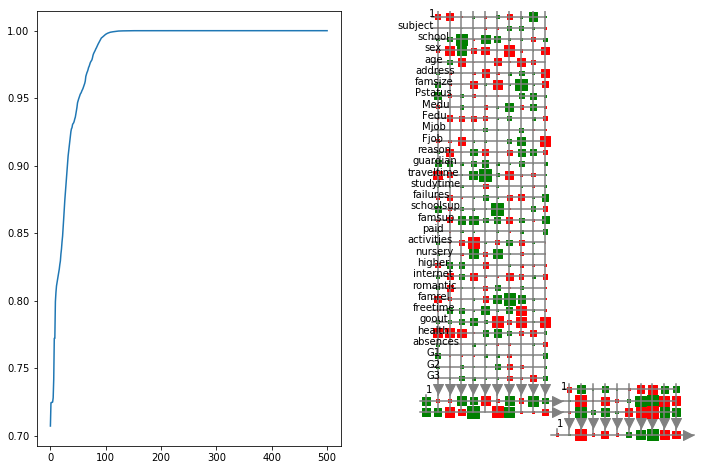

In [57]:
hiddens = [10,2,10]
plt.figure(figsize=(12,8))
nnet = nn.NeuralNetworkClassifier(X.shape[1],hiddens,len(np.unique(T)))
nnet.train(X,T,nIterations = 500)
plt.subplot(1,2,1)
plt.plot(np.exp(-nnet.getErrorTrace()))
plt.subplot(1,2,2)
nnet.draw(inputNames = Xnames)

In [58]:
predclass,prob,Z = nnet.use(X,allOutputs=True)
highest = X[np.argmax(prob[:,1]),:]
lowest = X[np.argmin(prob[:,1]),:]
print('Hi Alc  Lo Alc')
for h,l,n in zip(highest,lowest,Xnames):
    print('{}\t{}\t{}'.format(h,l,n))

Hi Alc  Lo Alc
1.0	1.0	subject
1.0	1.0	school
1.0	0.0	sex
17.0	16.0	age
1.0	0.0	address
1.0	0.0	famsize
0.0	1.0	Pstatus
1.0	2.0	Medu
1.0	2.0	Fedu
4.0	3.0	Mjob
2.0	4.0	Fjob
3.0	1.0	reason
1.0	0.0	guardian
3.0	2.0	traveltime
1.0	4.0	studytime
0.0	0.0	failures
0.0	0.0	schoolsup
0.0	0.0	famsup
0.0	0.0	paid
0.0	1.0	activities
0.0	0.0	nursery
0.0	0.0	higher
0.0	0.0	internet
0.0	1.0	romantic
4.0	1.0	famrel
2.0	2.0	freetime
4.0	1.0	goout
4.0	1.0	health
4.0	4.0	absences
12.0	10.0	G1
13.0	9.0	G2
14.0	11.0	G3


In [59]:
len(Z)

3

In [60]:
bottleneck = Z[1]
bottleneck.shape

(1044, 2)

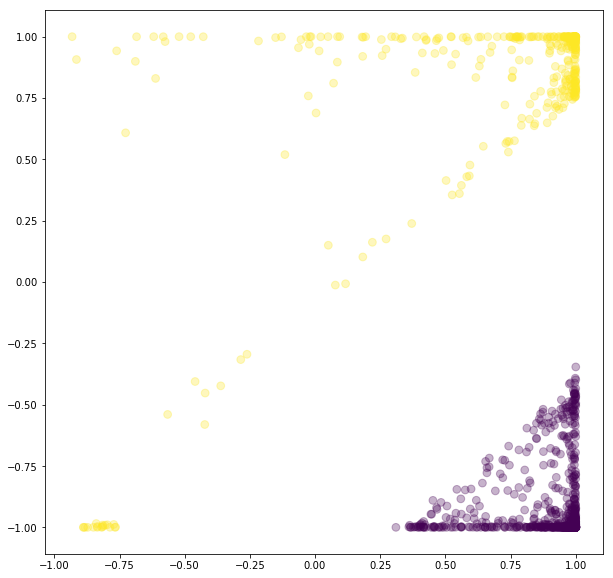

In [61]:
plt.figure(figsize=(10,10))
plt.scatter(bottleneck[:,0],bottleneck[:,1],c=T, s=60, alpha=0.3);

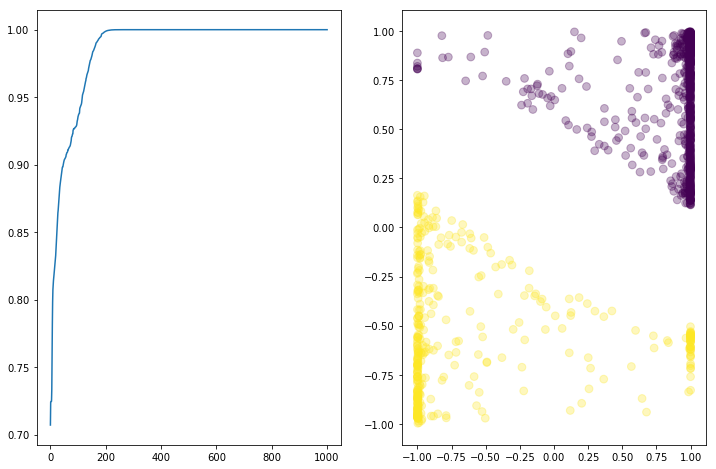

In [62]:
hiddens = [10,10,2,10,10]
plt.figure(figsize=(12,8))
nnet = nn.NeuralNetworkClassifier(X.shape[1],hiddens,len(np.unique(T)))
nnet.train(X,T,nIterations = 1000)
plt.subplot(1,2,1)
plt.plot(np.exp(-nnet.getErrorTrace()))
plt.subplot(1,2,2)
predclass,prob,Z = nnet.use(X,allOutputs=True)
bottleneck = Z[int(len(Z)/2)]
plt.scatter(bottleneck[:,0],bottleneck[:,1],c=T, s=60, alpha=0.3);

We should partition data into training and testing subsets, to see if the two-dimensional mapping learned on training data cleanly separates testing data.

In [70]:
def percCorrect(predicted,T):
    return np.sum(predicted == T) / T.shape[0] * 100

Hiddens [100, 50, 10, 2, 10, 50, 100] nIterations 10
Train % correct 82.6530612245
Test % correct  82.3076923077


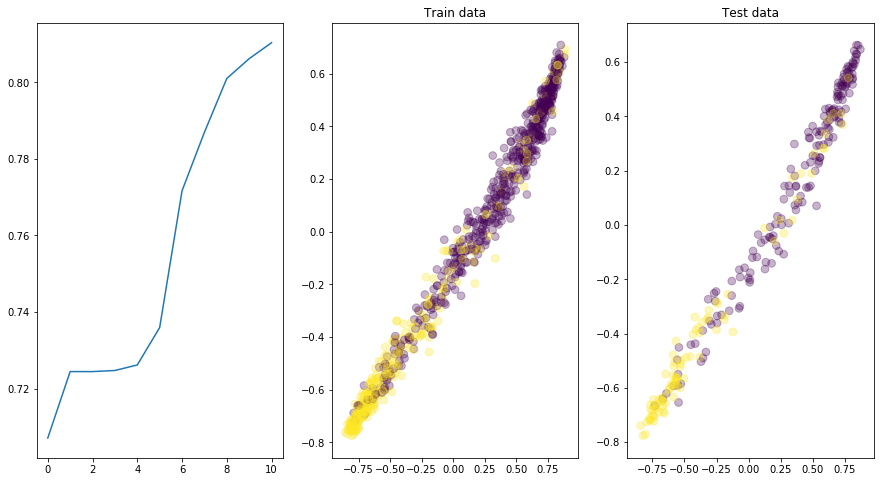

In [78]:
for Xtrain,Ttrain,Xtest,Ttest in ml.partitionsKFolds(X,T,4,validation=False,shuffle=True,classification=True):
    hiddens = [100,50,10,2,10,50,100]
    nIterations = 10
    plt.figure(figsize=(15,8))
    nnet = nn.NeuralNetworkClassifier(Xtrain.shape[1],hiddens,len(np.unique(Ttrain)))
    nnet.train(Xtrain,Ttrain,nIterations = nIterations)
    plt.subplot(1,3,1)
    plt.plot(np.exp(-nnet.getErrorTrace()))
    plt.subplot(1,3,2)
    predclassTrain,prob,Z = nnet.use(Xtrain,allOutputs=True)
    bottleneck = Z[int(len(Z)/2)]
    plt.scatter(bottleneck[:,0],bottleneck[:,1],c=Ttrain, s=60, alpha=0.3);
    plt.title('Train data')
    plt.subplot(1,3,3)
    predclassTest,prob,Z = nnet.use(Xtest,allOutputs=True)
    bottleneck = Z[int(len(Z)/2)]
    plt.scatter(bottleneck[:,0],bottleneck[:,1],c=Ttest, s=60, alpha=0.3)
    plt.title('Test data')
    
    print('Hiddens',hiddens,'nIterations',nIterations)
    print('Train % correct',percCorrect(predclassTrain,Ttrain))
    print('Test % correct ',percCorrect(predclassTest,Ttest))
    break
